In [1]:
# The libraries needed

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DAE
Some cleaning

In [2]:
df_ks = pd.read_csv("ks-projects-201801.csv")

In [3]:
df_ks.drop(columns="ID", inplace=True)

In [4]:
df_ks.deadline = pd.to_datetime(df_ks.deadline)
df_ks.launched = pd.to_datetime(df_ks.launched)

In [5]:
df_ks = df_ks.dropna()

# PCA

In [6]:
scaler = StandardScaler()
pca = PCA()

In [7]:
df_ks_scale = scaler.fit_transform(df_ks.select_dtypes("number"))

In [8]:
pca_ks=pca.fit_transform(df_ks_scale)
print(pca.explained_variance_ratio_)

[0.57540437 0.32375612 0.06026783 0.02474438 0.00955824 0.00626907]


In [9]:
pc1_ks=[]
pc2_ks=[]
pc3_ks=[]
pc4_ks=[]
pc5_ks=[]
pc6_ks=[]
for i in pca_ks:
    pc1_ks.append(i[0])
    pc2_ks.append(i[1])
    pc3_ks.append(i[2])
    pc4_ks.append(i[3])
    pc5_ks.append(i[4])
    pc6_ks.append(i[5])

In [10]:
# Adding the PCA components to the DataFrame
df_ks["pc1"]=pc1_ks
df_ks["pc2"]=pc2_ks
df_ks["pc3"]=pc3_ks
df_ks["pc4"]=pc4_ks
df_ks["pc5"]=pc5_ks
df_ks["pc6"]=pc6_ks

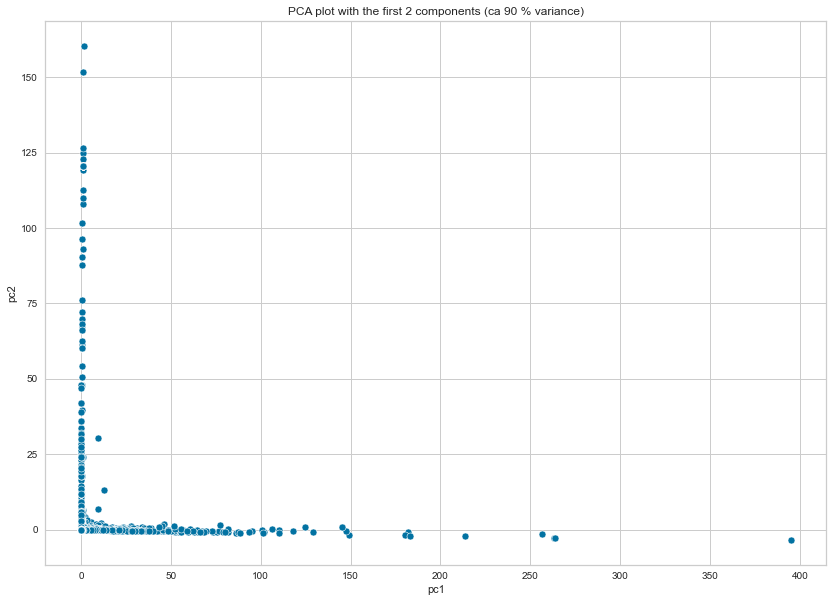

In [11]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pc1", y="pc2")
plt.title("PCA plot with the first 2 components (ca 90 % variance)")
plt.show()

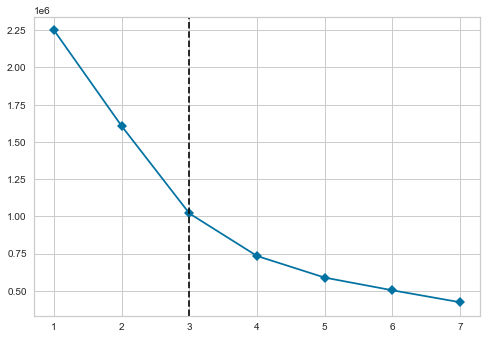

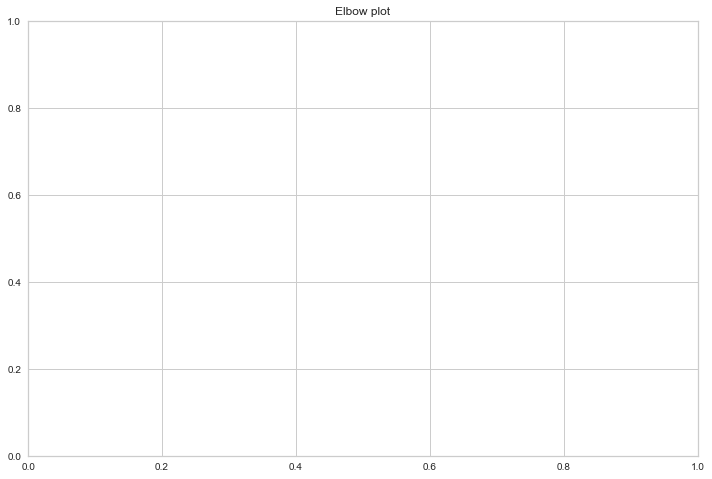

In [12]:
# Using an elbow plot to figure out the optimal number of clusters, in this case 3

elbow_viz = KElbowVisualizer(KMeans(), k=(1, 8), timings=False)
elbow_viz.fit(df_ks_scale)
plt.figure(figsize=(12, 8))
plt.title("Elbow plot")
plt.show()

# 3 clusters

In [13]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_ks_scale)

KMeans(n_clusters=3)

In [194]:
df_ks["clusters"] = kmeans.labels_ 

In [14]:
# Adding the cluster labels to both the scaled and unscaled DF

df_ks["clusters"] = kmeans.labels_
df_ks_scale = pd.DataFrame(df_ks_scale, columns=['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'])

df_ks_scale["clusters"] = kmeans.labels_

In [15]:
df_ks.clusters.value_counts()

0    374717
1        74
2        69
Name: clusters, dtype: int64

In [16]:
# renaming the clusters to something more exciting

df_ks.clusters.loc[df_ks.clusters == 0] = "The not-so-interesting"
df_ks.clusters.loc[df_ks.clusters == 2] = "High Profile"
df_ks.clusters.loc[df_ks.clusters == 1] = "The Overly Ambitious"
df_ks_scale.clusters.loc[df_ks_scale.clusters == 0] = "The not-so-interesting"
df_ks_scale.clusters.loc[df_ks_scale.clusters == 2] = "High Profile"
df_ks_scale.clusters.loc[df_ks_scale.clusters == 1] = "The Overly Ambitious"

C:\Users\kebbe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kebbe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## EDA
Trying to see what makes the cluster differ from each other

In [17]:
df_ks.groupby("clusters").mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pc1,pc2,pc3,pc4,pc5,pc6
clusters,,,,,,,,,,,,
High Profile,7.873947e+07,8.085046e+02,4.318841,8.248380e+02,8.247910e+02,7.440360e+07,0.748119,92.155324,0.034568,0.012163,1.403685,-0.126234
The Overly Ambitious,3.810529e+05,4.574183e+06,39799.770270,3.603355e+06,4.524749e+06,3.842406e+05,93.214714,-0.542921,1.354314,0.784920,-0.066470,-0.746900
The not-so-interesting,3.496763e+04,8.850790e+03,98.868533,6.327737e+03,8.230669e+03,3.210405e+04,-0.018546,-0.016862,-0.000274,-0.000157,-0.000245,0.000171


In [18]:
df_ks_scale.groupby("clusters").mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
clusters,,,,,,
High Profile,66.161588,-0.093136,-0.112283,-0.078992,-0.090847,64.169771
The Overly Ambitious,0.278746,47.540819,43.537012,45.731383,49.448630,0.292016
The not-so-interesting,-0.012238,-0.009371,-0.008577,-0.009017,-0.009749,-0.011874


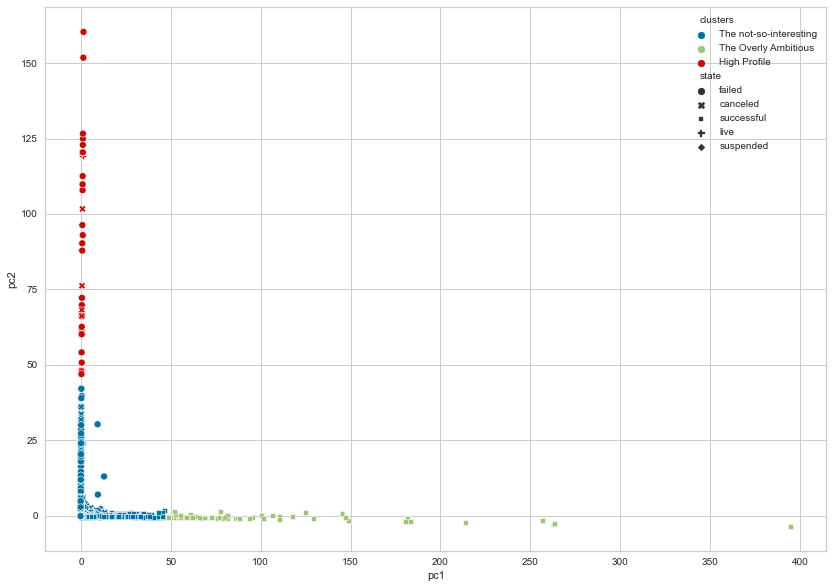

In [19]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pc1", y="pc2", hue="clusters", style="state")
plt.show()

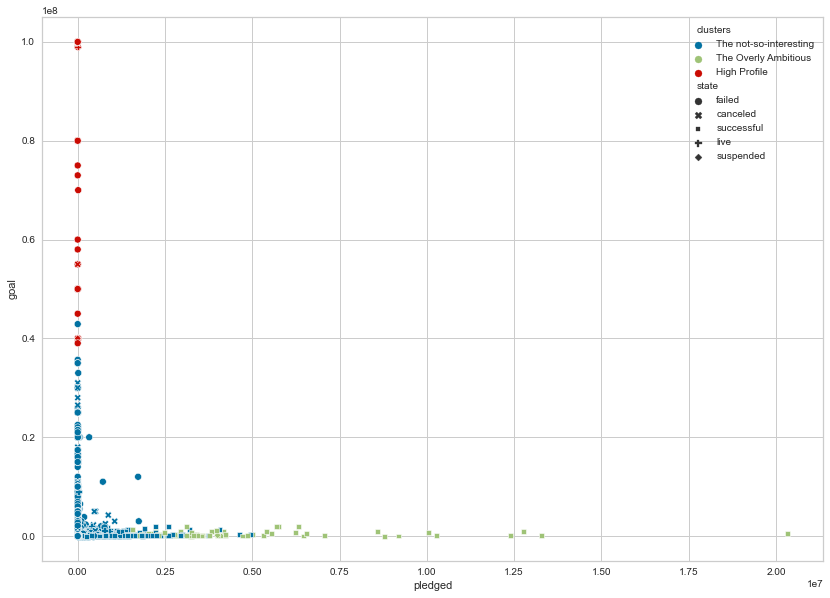

In [20]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_ks, x="pledged", y="goal", hue="clusters", style="state")
plt.show()

In [21]:
# Making seperate DataFrames for each cluster

df_ks_1 = df_ks.loc[df_ks.clusters == "High Profile"]
df_ks_2 = df_ks.loc[df_ks.clusters == "The Overly Ambitious"]
df_ks_3 = df_ks.loc[df_ks.clusters == "The not-so-interesting"]

In [22]:
lab =list(df_ks_1.groupby("category", as_index=False).count()[["category", "name"]].sort_values(by="name", ascending=False).category)

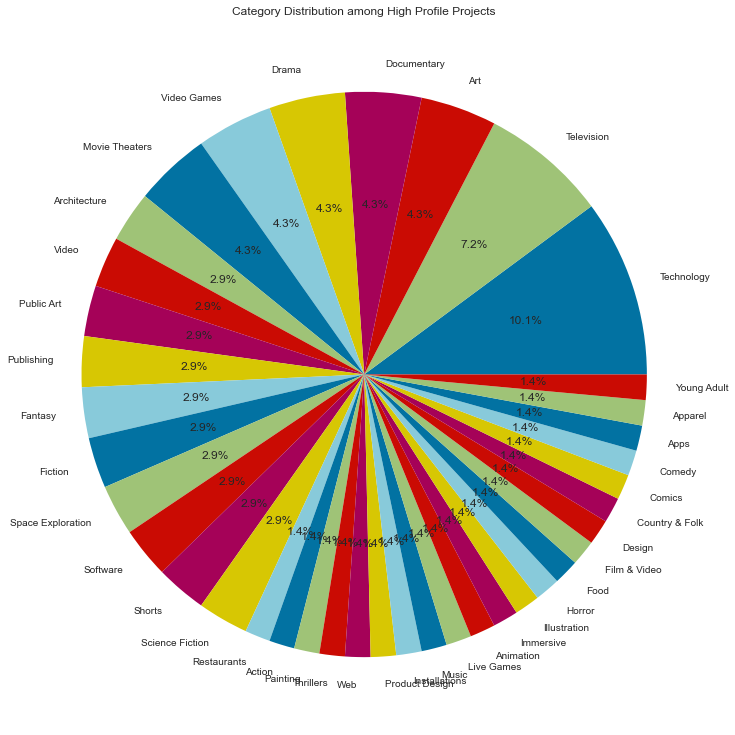

In [23]:
ma_plot = df_ks_1.groupby("category", as_index=False).count()[["category", "name"]].sort_values(by="name", ascending=False).plot.pie(y="name", autopct="%1.1f%%", figsize=(17,13), labels=lab)
ma_plot.set(ylabel="")
plt.legend("")
plt.title("Category Distribution among High Profile Projects")
plt.show()

In [24]:
# The names of the projects belonging to this cluster makes you realize why the machine made them into their own cluster

df_ks_2[["name", "backers"]].name.head(15)

330                 Pimax: The World's First 8K VR Headset
1873     Redefining Italian Luxury Watches - Filippo Lo...
3435           3Doodler: The World's First 3D Printing Pen
5526                       Oculus Rift: Step Into the Game
6665                OUYA: A New Kind of Video Game Console
9008                               Zombicide: Black Plague
14850                    Bloodstained: Ritual of the Night
23404                        Bears vs Babies - A Card Game
30041       Pono Music - Where Your Soul Rediscovers Music
38291           Yooka-Laylee - A 3D Platformer Rare-vival!
38404    Reaper Miniatures Bones 3: The Search for Mr. ...
47344    OSSIC X: The first 3D audio headphones calibra...
52268       The Micro: The First Truly Consumer 3D Printer
54026    Reaper Miniatures Bones II: The Return Of Mr B...
63540                                     Massive Darkness
Name: name, dtype: object

# Misc EDA

In [26]:
yrs=[]
for i in range(len(df_ks.groupby([df_ks.launched.dt.year, df_ks.launched.dt.month]).count().iloc[1:, :].index)):
    yrs.append(df_ks.groupby([df_ks.launched.dt.year, df_ks.launched.dt.month]).count().iloc[1:, :].index[i][0])

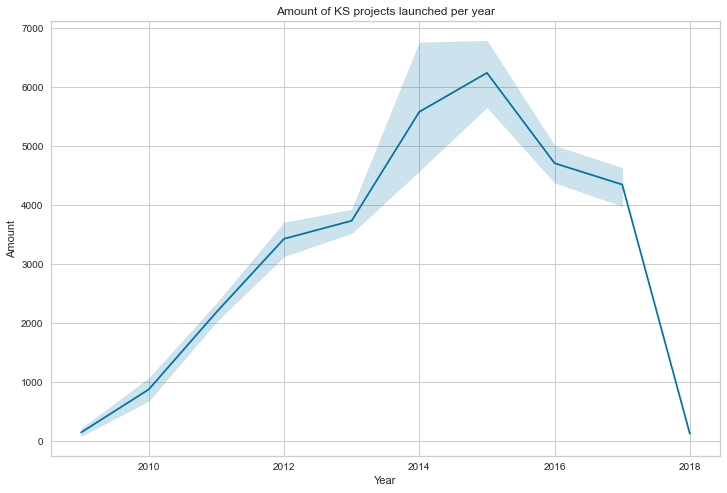

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_ks.groupby([df_ks.launched.dt.year, df_ks.launched.dt.month]).count().iloc[1:, :], x=yrs, y="name")
plt.title("Amount of KS projects launched per year")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

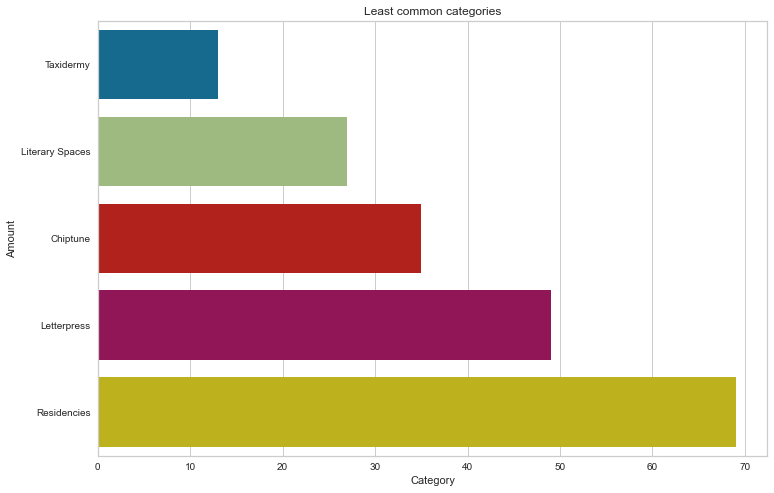

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_ks.groupby("category", as_index=False).count().sort_values(by="name").head(), x="name", y="category")
plt.title("Least common categories")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.show()

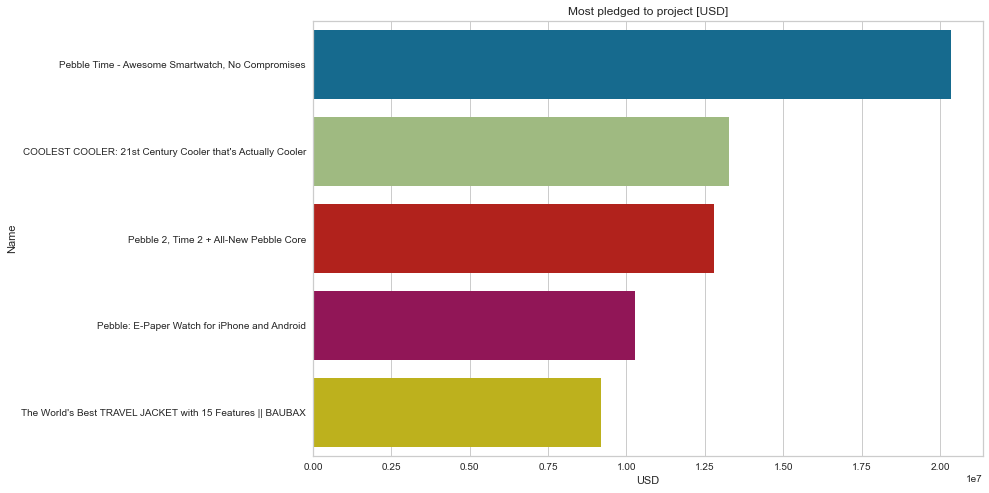

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_ks[["name", "usd pledged"]].sort_values(by="usd pledged", ascending=False).head(), x="usd pledged", y="name")
plt.title("Most pledged to project [USD]")
plt.xlabel("USD")
plt.ylabel("Name")
plt.show()